## **EDA**

In [ ]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS Bengkod/ObesityDataSet2.csv')

In [ ]:
#Melihat 5 Baris Pertama Dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Menampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
#Cek missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
#Menampilkan deskripsi data (statistik deskriptif untuk kolom numerik)
print(df.describe())

         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [ ]:
# Menampilkan tipe data setiap kolom
print(df.dtypes)


Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [ ]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 2111
Jumlah Kolom: 17


In [ ]:
#Cek Data Duplikat
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


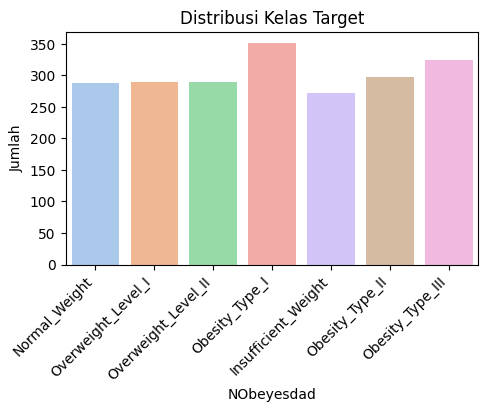

In [ ]:
#Distribusi Kelas Target
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="NObeyesdad", hue="NObeyesdad", palette="pastel", legend=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Distribusi Kelas Target")
plt.ylabel("Jumlah")
plt.show()

Age       float64
Height    float64
Weight    float64
dtype: object


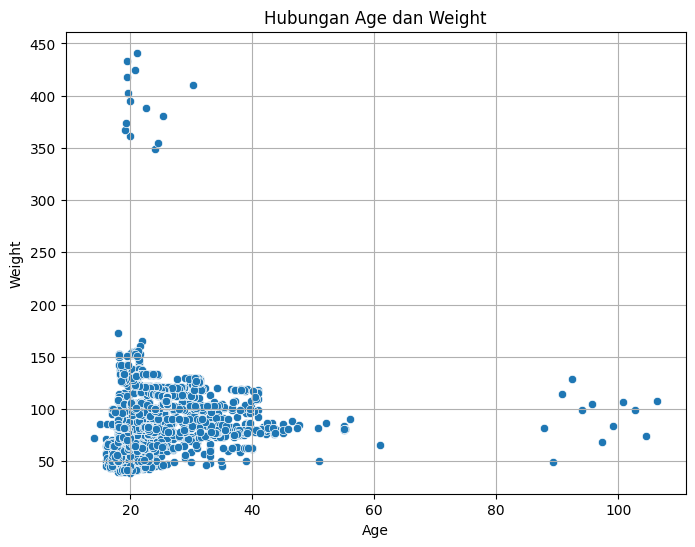

In [ ]:
# Konversi kolom ke numerik
numerik_cols = ['Age', 'Height', 'Weight']
for col in numerik_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numerik_cols].dtypes)

#Scatter plot hubungan antara umur dan berat
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Weight', data=df)
plt.title("Hubungan Age dan Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.grid(True)
plt.show()

Grafik menunjukkan sebagian besar data usia 20-40 tahun dengan berat 100-200 kg. Usia lebih tua (60-100 tahun) memiliki data lebih sedikit dan berat bervariasi, tanpa korelasi kuat antara usia dan berat.

## **PRE PROCESSING**

In [ ]:
# Import library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Ganti tanda '?' menjadi NaN agar bisa dideteksi sebagai missing value
df.replace('?', np.nan, inplace=True)

# Ubah kolom-kolom yang seharusnya numerik ke tipe float
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek tipe kolom dan tentukan kolom kategorikal dan numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Untuk data kategorikal, isi missing value dengan modus (nilai terbanyak)
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]]).ravel()

# Untuk data numerik, isi missing value dengan median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])

# Hapus data duplikat
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

df.head(50)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.62,64.000000,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.52,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.00000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.80,77.000000,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.80,87.000000,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.00000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.78,89.800000,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
5,29.000000,Male,1.62,53.000000,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.00000,Sometimes,Automobile,Normal_Weight
6,23.000000,Female,1.50,55.000000,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.00000,Sometimes,Motorbike,Normal_Weight
7,22.000000,Male,1.64,53.000000,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.00000,Sometimes,Public_Transportation,Normal_Weight
8,24.000000,Male,1.78,348.497776,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
9,22.000000,Male,1.72,68.000000,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.00000,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
print(f"Jumlah data sebelum hapus duplikat: {before}")
print(f"Jumlah data setelah hapus duplikat: {after}")
print(f"Jumlah data duplikat yang dihapus: {before - after}")

Jumlah data sebelum hapus duplikat: 2111
Jumlah data setelah hapus duplikat: 2091
Jumlah data duplikat yang dihapus: 20


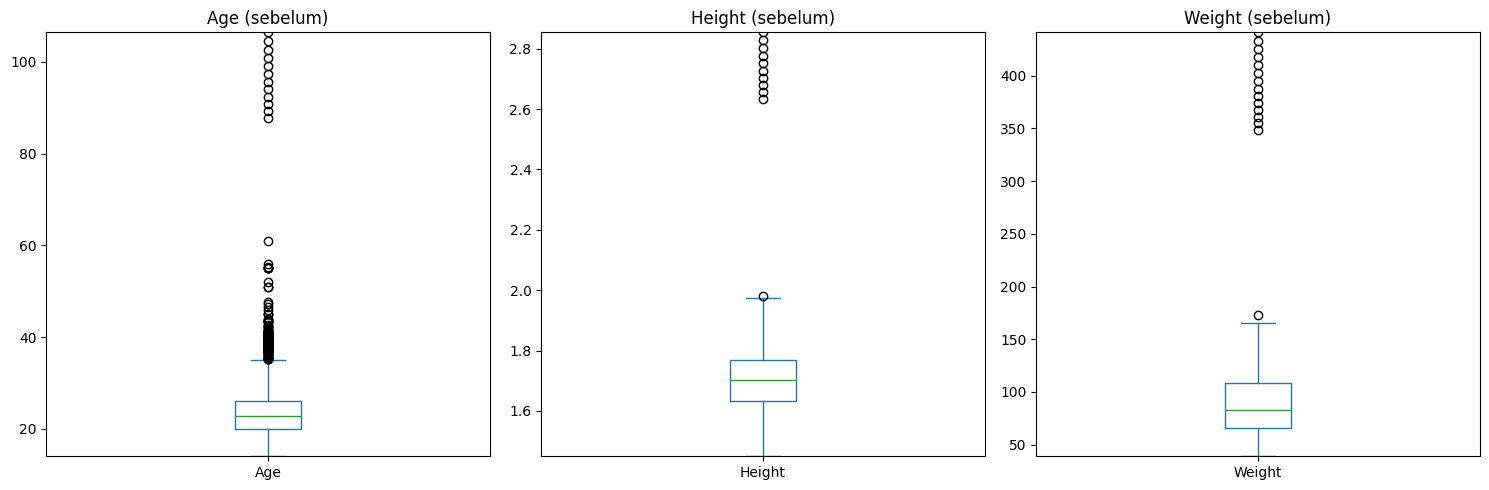

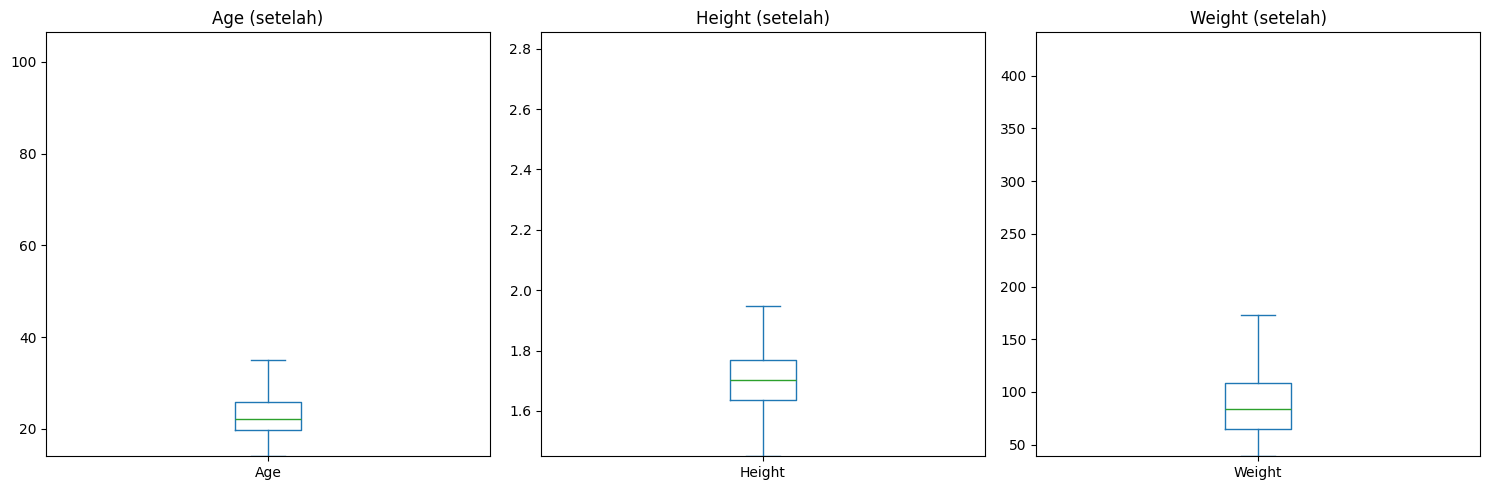

In [ ]:
# Pastikan data numerik benar
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Tentukan batas sumbu y agar konsisten
y_limits = {}
for col in num_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    y_limits[col] = (min_val, max_val)

# visualisasi data numerik sebelum menangani outlier
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (sebelum)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

# Metode IQR untuk menghapus outlier dari kolom numerik
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Visualisasi boxplot setelah outlier ditangani
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (setelah)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Encoding fitur kategorikal (selain target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')

# Label encoding untuk fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encoding untuk target
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])
label_encoders['NObeyesdad'] = target_encoder

# Simpan hasil encoding ke file .pkl
joblib.dump(label_encoders, 'label_encoders.pkl')

# Tampilkan hasil encode awal
print("Data setelah encoding:")
display(df.head())

Data setelah encoding:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


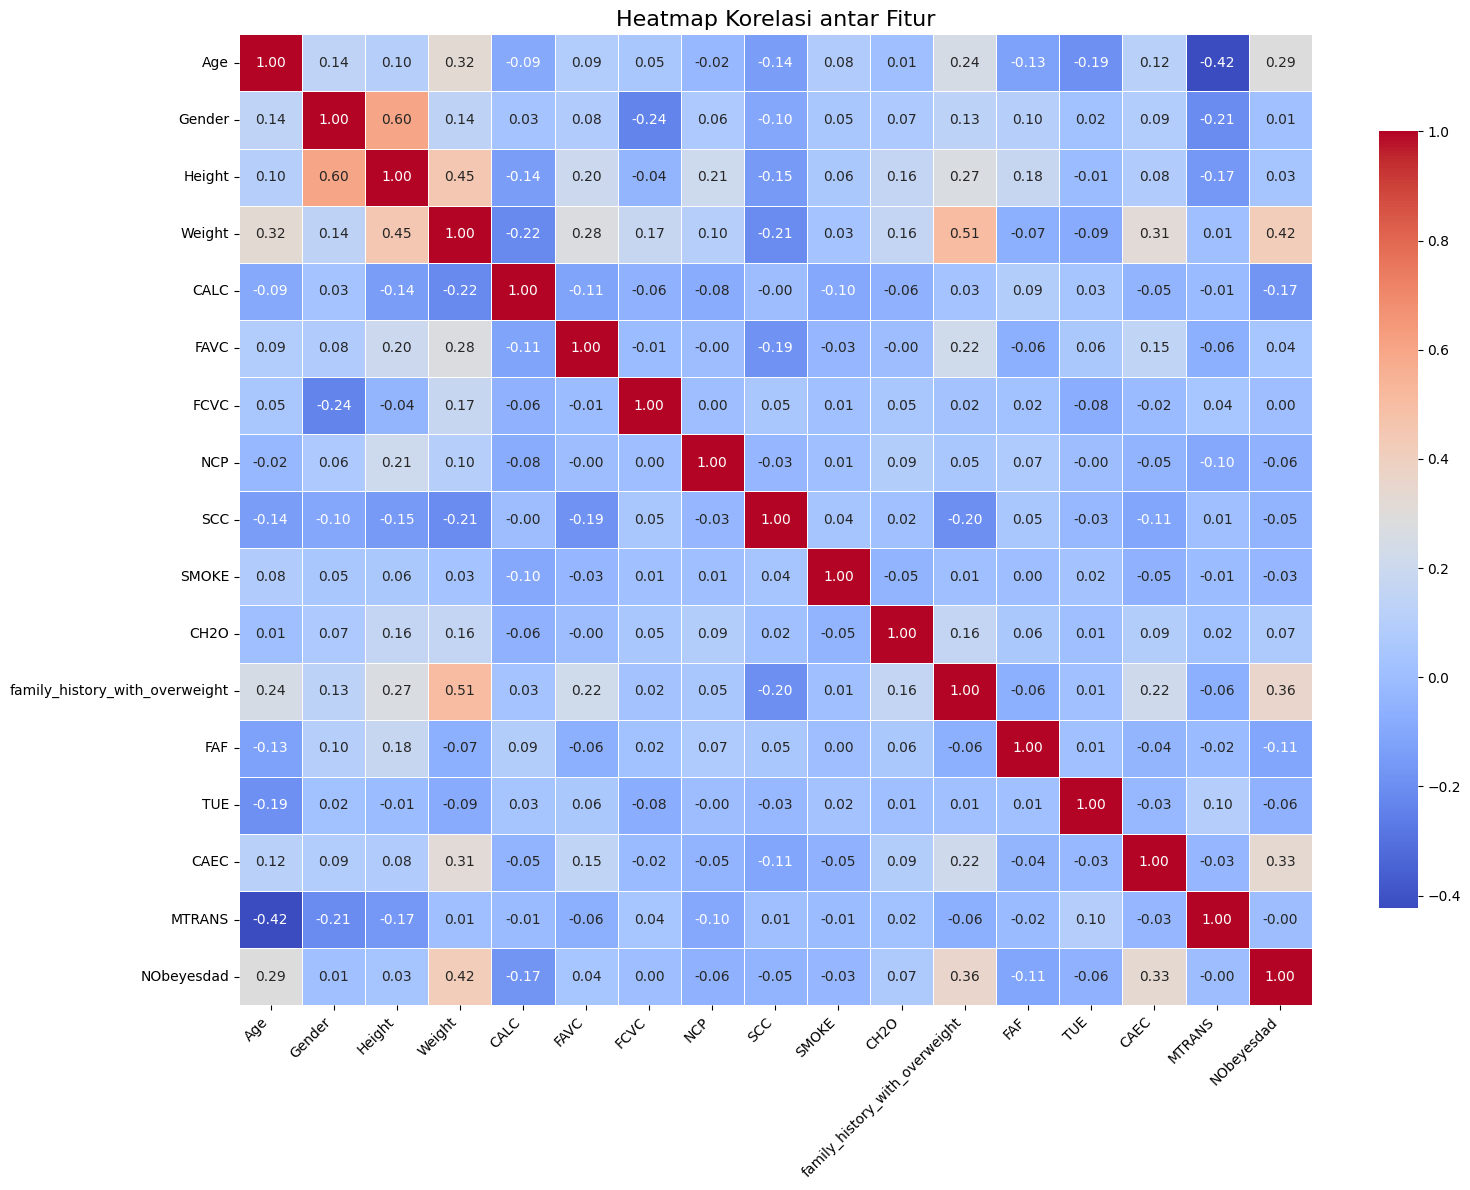

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Heatmap Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simpan hasil scaler ke file .pkl
joblib.dump(scaler, 'scaler.pkl')

# (Opsional) Tampilkan hasil standarisasi untuk verifikasi
print("X_scaled shape:", X_scaled.shape)
print("Sample X_scaled:\n", X_scaled[:5])

X_scaled shape: (1886, 16)
Sample X_scaled:
 [[-4.54954589e-01 -1.03233590e+00 -9.35022102e-01 -8.53608758e-01
   1.44180577e+00 -2.73779026e+00 -7.08184454e-01  2.71426129e-01
  -2.29031345e-01 -1.41459594e-01 -4.93850460e-02  4.73999288e-01
  -9.39230164e-01  3.93343452e-01  3.24989928e-01  4.00301684e-01]
 [-4.54954589e-01 -1.03233590e+00 -2.02806227e+00 -1.15271531e+00
  -5.32955076e-01 -2.73779026e+00  8.62964056e-01  2.71426129e-01
   4.36621458e+00  7.06915645e+00  1.29610405e+00  4.73999288e-01
   1.62051735e+00 -1.01603768e+00  3.24989928e-01  4.00301684e-01]
 [ 1.18260355e-02  9.68676957e-01  1.03245021e+00 -3.67560609e-01
  -2.50771593e+00 -2.73779026e+00 -7.08184454e-01  2.71426129e-01
  -2.29031345e-01 -1.41459594e-01 -4.93850460e-02  4.73999288e-01
   7.67268181e-01  3.93343452e-01  3.24989928e-01  4.00301684e-01]
 [ 9.45387285e-01  9.68676957e-01  1.03245021e+00  6.32258259e-03
  -2.50771593e+00 -2.73779026e+00  8.62964056e-01  2.71426129e-01
  -2.29031345e-01 -1.4145959

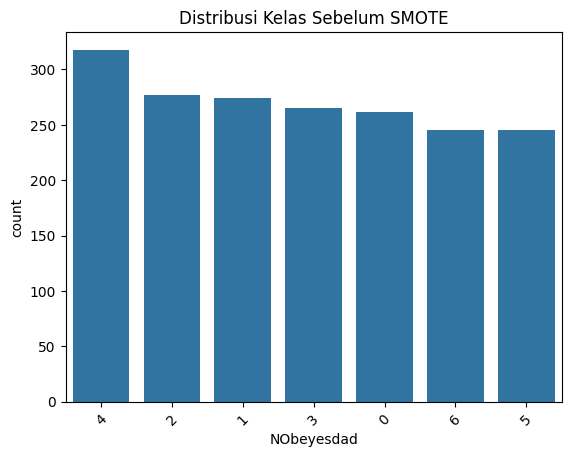

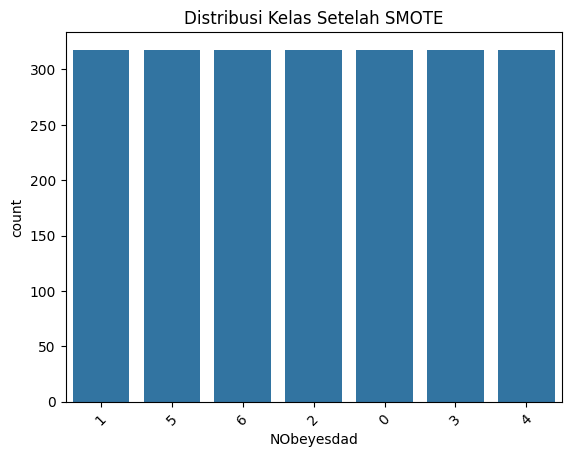

In [ ]:
# Visualisasi distribusi kelas sebelum SMOTE
sns.countplot(x=y, order=pd.Series(y).value_counts().index)
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xticks(rotation=45)
plt.show()

# Tangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Distribusi kelas setelah SMOTE
sns.countplot(x=y_resampled, order=pd.Series(y_resampled).value_counts().index)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()



*   Insufficient Weight = (0)
*   Normal Weight = (1)
*   Overweight Level 1 = (5)
*   Overweight Level 2 = (6)
*   Obesity Type 1 = (2)
*   Obesity Type 2 = (3)
*   Obesity Type 3 = (4)










In [ ]:
# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

# dataset dibagi menjadi 80% data latih dan 20% data uji dengan 16 kolom fitur yang ada di dalam dataset

Ukuran data latih: (1780, 16)
Ukuran data uji: (446, 16)


Kesimpulan :


Missing values pada kolom kategorikal berhasil diganti dengan modus dan pada kolom numerik dengan median, memberikan manfaat penting meskipun dataset relatif kecil, sementara data duplikat telah dihapus dengan menyisakan kolom asli.

Semua fitur kategorikal telah dikonversi ke bentuk numerik menggunakan Label Encoding, dan tidak ada fitur yang dihapus karena tidak ditemukan korelasi rendah dengan target.

Selain itu, data numerik telah dinormalisasi dengan StandardScaler untuk memastikan skala seragam, dan ketidakseimbangan kelas target telah ditangani menggunakan teknik SMOTE, sebelum dataset akhirnya dibagi menjadi data latih dan data uji untuk keperluan pemodelan.

## **MODELLING DAN EVALUASI**

In [ ]:
# Import lib Model klasifikasi
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import lib Metrik evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Inisialisasi model
models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Loop untuk pelatihan dan prediksi masing-masing model
for model_name, model in models.items():
    print(f"Model Algoritma: {model_name}")
    model.fit(X_train, y_train)  # latih model
    y_pred = model.predict(X_test)  # prediksi

    # Evaluasi metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil
    results[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "y_pred": y_pred
    }

    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))
    print("="*60)

Model Algoritma: SVM
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.99      0.95        70
      Normal_Weight       0.95      0.81      0.88        70
     Obesity_Type_I       0.92      0.92      0.92        64
    Obesity_Type_II       0.95      1.00      0.97        58
   Obesity_Type_III       1.00      0.97      0.98        60
 Overweight_Level_I       0.88      0.95      0.92        64
Overweight_Level_II       0.93      0.90      0.92        60

           accuracy                           0.93       446
          macro avg       0.94      0.93      0.93       446
       weighted avg       0.93      0.93      0.93       446

Model Algoritma: Random Forest
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.93      0.95        70
      Normal_Weight       0.83      0.96      0.89        70
     Obesity_Type_I       1.00      0.97      0.98        64
    Obesity_Type_II       0.9

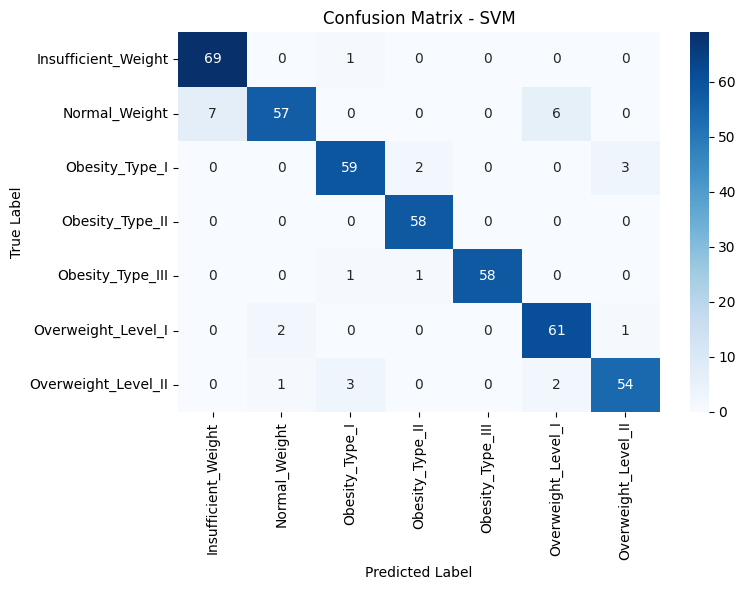

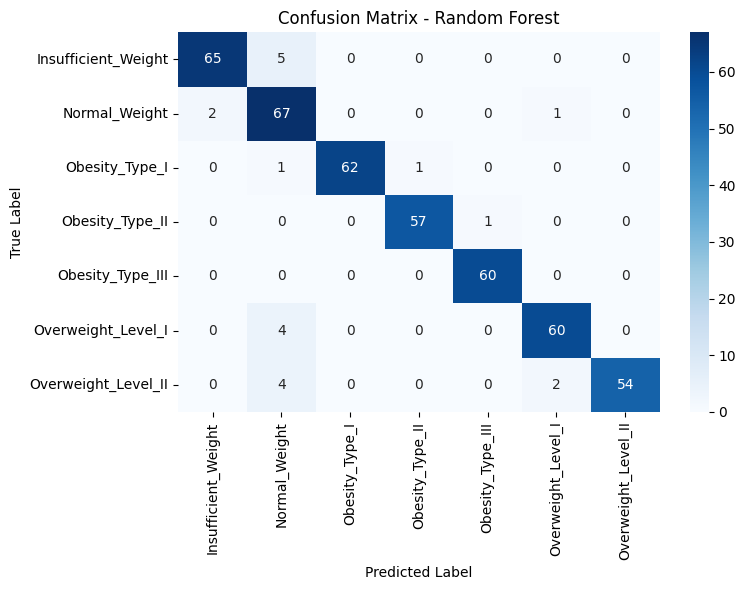

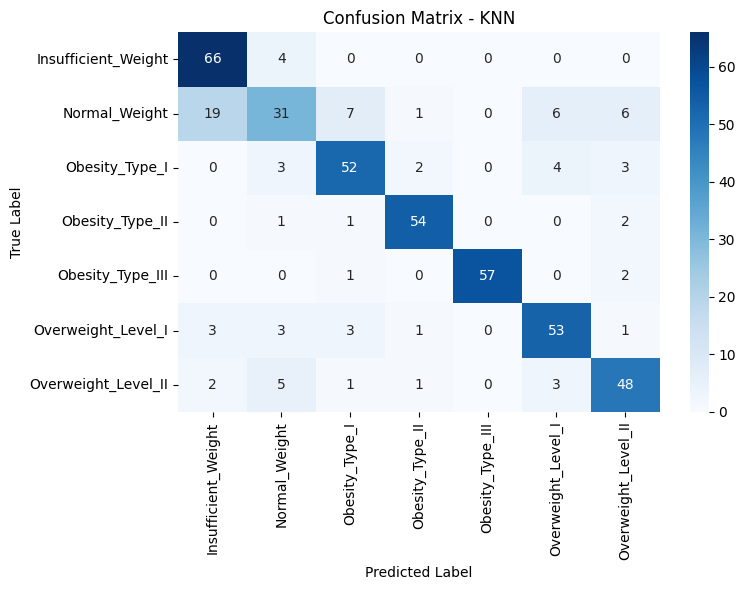

In [ ]:
# Plot confusion matrix dari setiap model
for model_name in models:
    cm = confusion_matrix(y_test, results[model_name]["y_pred"])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


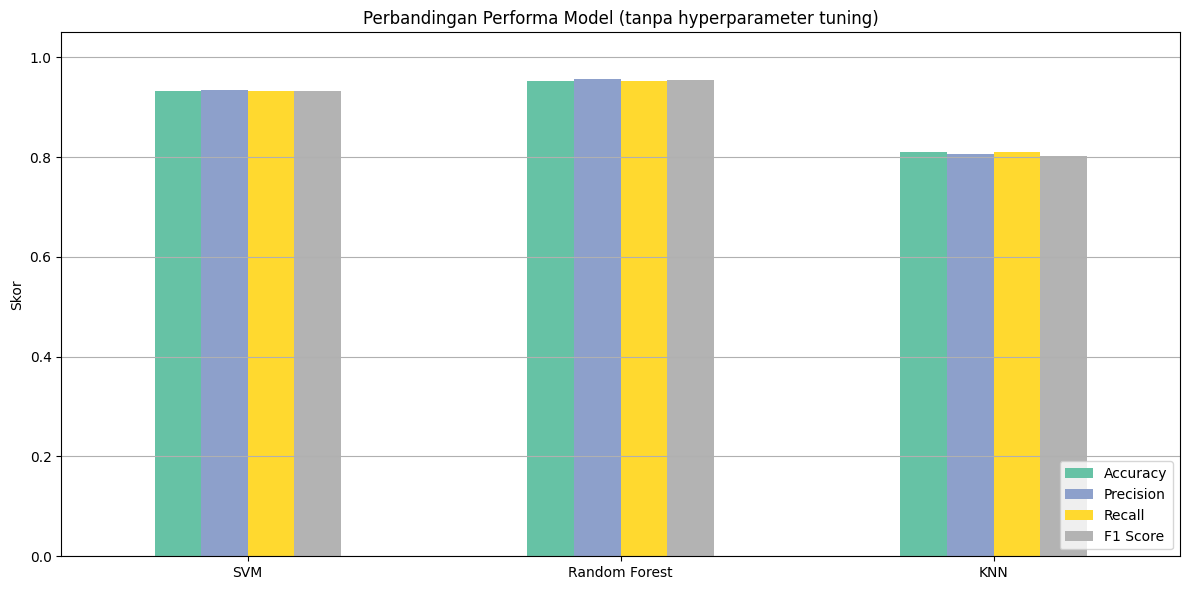

Tabel Hasil Evaluasi Model:


,Accuracy,Precision,Recall,F1 Score
SVM,0.932735,0.934175,0.932735,0.932045
Random Forest,0.952915,0.956907,0.952915,0.953689
KNN,0.809417,0.806354,0.809417,0.802329


In [ ]:
# Konversi dictionary hasil ke DataFrame
results_df = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Visualisasi perbandingan
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Perbandingan Performa Model (tanpa hyperparameter tuning)")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tampilkan tabel evaluasi
print("Tabel Hasil Evaluasi Model:")
display(results_df)


Kesimpulan :

SVM dan Random Forest menunjukkan performa yang hampir sama, dengan skor Accuracy, Precision, Recall, dan F1 Score mendekati 1.0, menandakan keduanya memiliki kinerja yang sangat baik pada dataset ini.

KNN memiliki performa yang sedikit lebih rendah dibandingkan SVM dan Random Forest, dengan skor Accuracy, Precision, Recall, dan F1 Score sekitar 0.8, menunjukkan kinerja yang baik tetapi tidak seoptimal dua model lainnya.

Secara keseluruhan, ketiga model menunjukkan hasil yang cukup solid, namun SVM dan Random Forest tampak lebih unggul tanpa perlu tuning tambahan. Jika diperlukan peningkatan lebih lanjut, tuning hyperparameter dapat dipertimbangkan, terutama untuk KNN.






## **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk setiap model
param_grid = {
    'SVM': {  # Mengganti Logistic Regression dengan SVM
        'C': [0.01, 0.1, 1, 10, 100],         # Parameter regulasi (semakin kecil, semakin kuat regulasinya)
        'kernel': ['linear', 'rbf'],           # Jenis kernel (linear atau radial basis function)
        'gamma': ['scale', 'auto', 0.1, 1]    # Parameter untuk kernel non-linear (khusus rbf)
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],          # Jumlah pohon dalam ensemble
        'max_depth': [None, 10, 20],             # Kedalaman maksimum setiap pohon (None = tidak dibatasi)
        'min_samples_split': [2, 5],             # Minimum jumlah sampel untuk memisahkan node
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],            # Jumlah tetangga terdekat yang digunakan untuk klasifikasi
        'weights': ['uniform', 'distance'],     # Bobot tetangga (uniform = semua sama, distance = lebih dekat lebih berpengaruh)
        'metric': ['euclidean', 'manhattan']    # Metode pengukuran jarak antar data
    }
}

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib
import os

# Definisikan base models
base_models = {
    'SVM': SVC(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Menyimpan model hasil tuning dan evaluasinya
best_models = {}     # Menyimpan model terbaik dari hasil tuning
tuned_results = {}   # Menyimpan hasil evaluasi tiap model setelah tuning

# Loop untuk tuning dan evaluasi masing-masing model
for name in base_models:
    print(f"Tuning model: {name}")

    # Lakukan pencarian kombinasi hyperparameter terbaik menggunakan GridSearchCV
    grid = GridSearchCV(
        base_models[name],
        param_grid[name],
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)     # latih GridSearch dengan data latih

    best_model = grid.best_estimator_   # simpan model dengan kombinasi parameter terbaik
    best_models[name] = best_model      # simpan ke dictionary

    # Evaluasi ulang model terbaik
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    tuned_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "y_pred": y_pred
    }

    print(f"Best Params: {grid.best_params_}")
    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))
    print("="*60)

# Simpan semua model yang dituning ke dalam satu file .pkl
os.makedirs('models', exist_ok=True)  # Buat folder 'models' jika belum ada
joblib.dump(best_models, 'models/all_tuned_models.pkl')

Tuning model: SVM


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.99      0.94        70
      Normal_Weight       0.95      0.80      0.87        70
     Obesity_Type_I       0.92      0.94      0.93        64
    Obesity_Type_II       0.95      1.00      0.97        58
   Obesity_Type_III       1.00      0.97      0.98        60
 Overweight_Level_I       0.91      0.95      0.93        64
Overweight_Level_II       0.95      0.93      0.94        60

           accuracy                           0.94       446
          macro avg       0.94      0.94      0.94       446
       weighted avg       0.94      0.94      0.94       446

Tuning model: Random Forest
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.94      0.96        70
      Normal_Weight       0.86      0

['models/all_tuned_models.pkl']

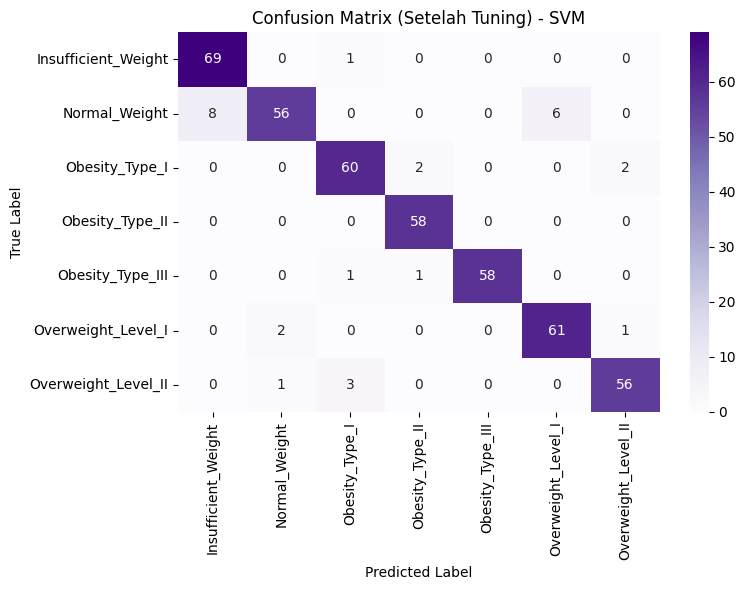

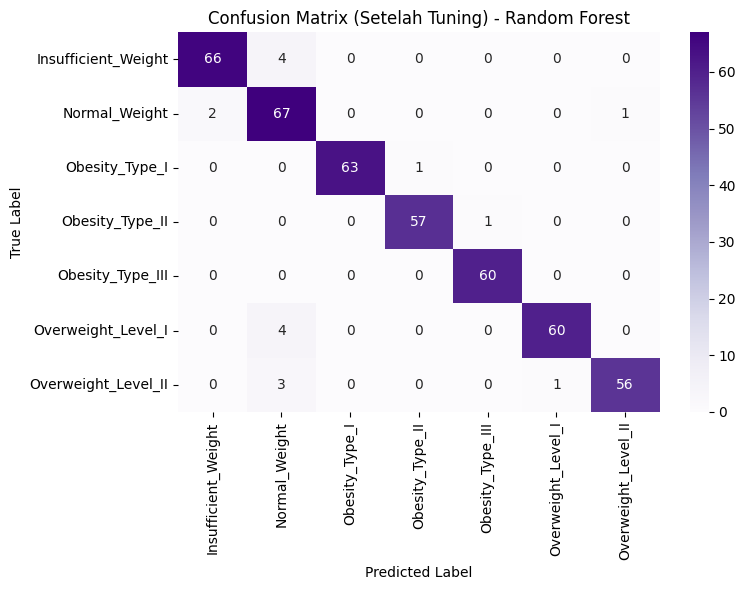

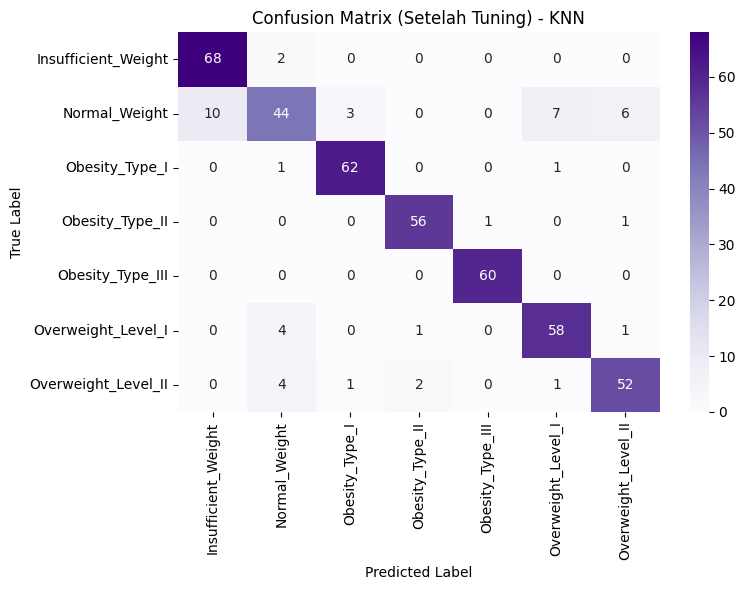

In [ ]:
# Menampilkan confusion matrix dari model hasil tuning
for model_name, model in best_models.items():
    y_pred = tuned_results[model_name]["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix (Setelah Tuning) - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


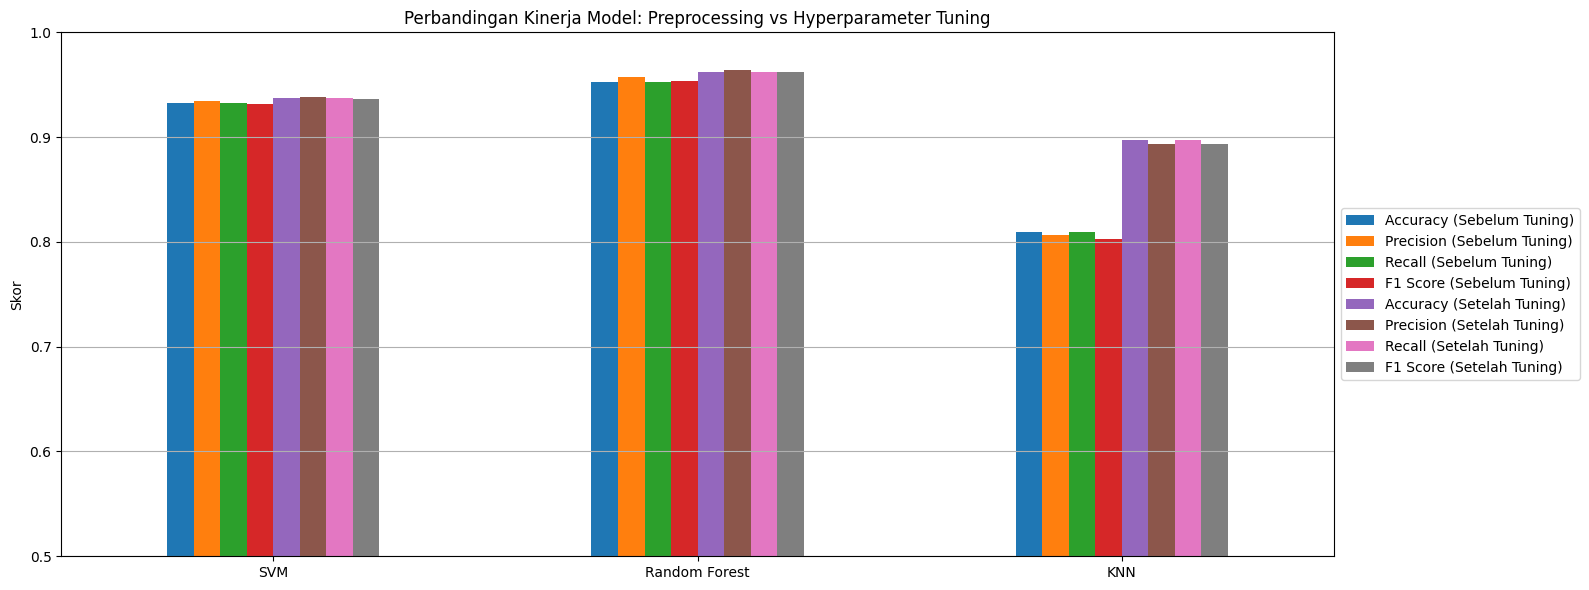

In [ ]:
# DataFrame hasil setelah preprocessing (sebelum tuning)
before_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
before_df.columns = [col + " (Sebelum Tuning)" for col in before_df.columns]

# DataFrame hasil setelah tuning
after_df = pd.DataFrame(tuned_results).T.drop(columns='y_pred')
after_df.columns = [col + " (Setelah Tuning)" for col in after_df.columns]

# Gabungkan semua menjadi satu DataFrame
compare_df = pd.concat([before_df, after_df], axis=1)

# Visualisasi
compare_df.plot(kind='bar', figsize=(16, 6))
plt.title("Perbandingan Kinerja Model: Preprocessing vs Hyperparameter Tuning")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

INFERENSI DATA

In [ ]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Muat model, scaler, dan label encoder yang telah disimpan
try:
    # Asumsi model terbaik dari tuning SVM, Random Forest, atau KNN dipilih.
    # Anda perlu memuat model spesifik yang ingin Anda gunakan, misal:
    # model = joblib.load('models/SVM_tuned_model.pkl') # Jika disimpan per model
    # Jika Anda menyimpan semua model dalam satu file 'all_tuned_models.pkl',
    # Anda perlu memilih model mana yang akan digunakan dari dictionary yang dimuat.
    all_tuned_models = joblib.load('models/all_tuned_models.pkl')
    # Pilih salah satu model, misalnya SVM yang sering performa baik
    model = all_tuned_models['SVM'] # Anda bisa ganti 'SVM' dengan 'Random Forest' atau 'KNN'

    scaler = joblib.load('scaler.pkl')
    le = joblib.load('label_encoders.pkl')
    # Ambil target encoder secara spesifik
    target_encoder = le['NObeyesdad']
    print("Model, Scaler, dan Label Encoder berhasil dimuat.")
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
    print("Pastikan file 'models/all_tuned_models.pkl', 'scaler.pkl', dan 'label_encoders.pkl' ada.")
    exit()
except KeyError as e:
    print(f"Error accessing key in loaded dictionary: {e}")
    print("Pastikan dictionary yang dimuat dari 'label_encoders.pkl' memiliki key 'NObeyesdad'.")
    exit()


# 2. Siapkan data baru untuk diprediksi (contoh)
# Anda bisa mengubah nilai-nilai di bawah ini untuk menguji kasus yang berbeda.
data_baru = {
    'Gender': 'Male',  # 'Male' atau 'Female'
    'Age': 25,
    'Height': 1.80,
    'Weight': 85,
    'family_history_with_overweight': 'yes',  # 'yes' atau 'no'
    'FAVC': 'yes',  # Konsumsi makanan tinggi kalori (Frequently alcoholic beverages consumption)
    'FCVC': 2,  # Frekuensi konsumsi sayuran (1-3)
    'NCP': 3,  # Jumlah makanan utama (1-4)
    'CAEC': 'Sometimes',  # Konsumsi makanan di antara waktu makan ('no', 'Sometimes', 'Frequently', 'Always')
    'SMOKE': 'no',  # Merokok?
    'CH2O': 2,  # Konsumsi air (liter)
    'SCC': 'no',  # Monitor konsumsi kalori
    'FAF': 1,  # Frekuensi aktivitas fisik (0-3)
    'TUE': 1,  # Waktu penggunaan perangkat teknologi (0-2)
    'CALC': 'Sometimes',  # Konsumsi alkohol ('no', 'Sometimes', 'Frequently', 'Always')
    'MTRANS': 'Public_Transportation'  # Transportasi yang digunakan
}

# Tampilkan data input
print("\nData Pasien Baru:")
for key, val in data_baru.items():
    print(f"- {key}: {val}")

# 3. Lakukan preprocessing pada data baru
# Buat DataFrame dari data baru
input_df = pd.DataFrame([data_baru])

# --- Pastikan preprocessing data baru cocok dengan preprocessing data training ---

# Apply label encoders to categorical columns
categorical_cols_for_encoding = [col for col in le.keys() if col != 'NObeyesdad']

for col in categorical_cols_for_encoding:
    if col in input_df.columns:
        # Gunakan encoder yang sudah dimuat
        if col in le:
            # Handle potential unknown values in inference data
            # Check if the value in input_df exists in the encoder's classes_
            if input_df[col].iloc[0] not in le[col].classes_:
                print(f"Warning: Unknown value '{input_df[col].iloc[0]}' in column '{col}'. Using a default value or skipping.")
                # Option 1: Replace with a known value (e.g., mode from training)
                # This requires knowing the mode from the training data for this column
                # input_df[col] = <mode_value_from_training>
                # Option 2: Handle based on your training logic (e.g., treat as NaN if imputation was used)
                # For simplicity here, we'll raise an error or set to NaN if not mapped
                # If you used SimpleImputer on categorical data with 'most_frequent', you might need to simulate that.
                # A robust solution would involve a preprocessing pipeline.
                # For now, let's map to a placeholder or the mode if known.
                # A safer approach is to ensure all possible categories were seen during fit.
                # If an unknown value appears, label encoding might fail.
                # Let's try a more robust mapping that includes handling for unseen data
                # Convert to category type with known classes, then get codes
                input_df[col] = pd.Categorical(input_df[col], categories=le[col].classes_).codes
            else:
                input_df[col] = le[col].transform(input_df[col])
        else:
            print(f"Warning: Label encoder not found for column '{col}'. Skipping encoding.")
    else:
        print(f"Warning: Column '{col}' not found in input data.")


# Pastikan semua kolom yang digunakan saat fitting scaler ada di input_df
# dan dalam urutan yang benar. scaler.feature_names_in_ menyimpan urutan kolom.
if hasattr(scaler, 'feature_names_in_'):
    expected_columns = scaler.feature_names_in_
    # Add any missing columns with a default value (e.g., 0 or mean) if necessary
    # based on how missing values were handled in training for these columns
    # For now, let's check if all expected columns exist
    missing_cols = set(expected_columns) - set(input_df.columns)
    if missing_cols:
        print(f"Error: Missing columns in input data: {missing_cols}. Cannot proceed with scaling.")
        # You need to decide how to handle this. If these columns were in training,
        # they must be present in inference data, possibly with default/placeholder values.
        exit()

    # Reorder columns to match the training data
    input_df = input_df[expected_columns]
else:
    print("\nWarning: Scaler does not store feature names. Assuming input column order is correct based on training data.")
    # If scaler doesn't store feature names, you MUST manually ensure the column order
    # and presence match the data used to fit the scaler.
    # Example:
    # expected_columns_manual = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
    # if set(expected_columns_manual) != set(input_df.columns):
    #      print("Error: Input columns do not match expected columns.")
    #      exit()
    # input_df = input_df[expected_columns_manual]


# Apply scaling to the entire DataFrame
# The scaler was fitted on the entire X_scaled dataset after encoding,
# so it expects all features, not just numerical ones.
try:
    input_scaled = scaler.transform(input_df)
except ValueError as e:
    print(f"Error during scaling: {e}")
    print("This is likely due to mismatch in column names or order.")
    print("Input DataFrame columns:", input_df.columns.tolist())
    if hasattr(scaler, 'feature_names_in_'):
        print("Scaler expected columns:", scaler.feature_names_in_.tolist())
    exit()


# 4. Buat Prediksi
prediction_encoded = model.predict(input_scaled)

# 5. Ubah hasil prediksi kembali ke label asli
# Gunakan target_encoder yang sudah dimuat
prediction_label = target_encoder.inverse_transform(prediction_encoded)

# Tampilkan hasil
print("\n-------------------------------------------")
print(f"Hasil Prediksi Tingkat Obesitas: {prediction_label[0]}")
print("-------------------------------------------")

Model, Scaler, dan Label Encoder berhasil dimuat.

Data Pasien Baru:
- Gender: Male
- Age: 25
- Height: 1.8
- Weight: 85
- family_history_with_overweight: yes
- FAVC: yes
- FCVC: 2
- NCP: 3
- CAEC: Sometimes
- SMOKE: no
- CH2O: 2
- SCC: no
- FAF: 1
- TUE: 1
- CALC: Sometimes
- MTRANS: Public_Transportation

-------------------------------------------
Hasil Prediksi Tingkat Obesitas: Overweight_Level_I
-------------------------------------------
